### Select Audio files
In this part, I would like to select my data set and copy the selected audio files to another directory. 
I am using these audio files: Frog:4, Sheep:8, Rain:10, Sea waves:11, Laughing:26, Snoring:28, Mouse click:31, Clock tick:38, Helicopter:40, Church bells:46   
my_target_audio = [4, 8, 10, 11, 26, 28, 31, 38, 40, 46]

According to csv file, I will select the ones which end with the -target.wav 
Now I have 400 selected audio files in my_audio directory


In [ ]:
import pandas as pd
import os
import requests
import shutil


file_path = 'ESC-50-master/meta/esc50.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# I am using these data frames: 
# Frog:4,         Sheep:8, 
# Rain:10,        Sea waves:11,
# Laughing:26,    Snoring:28, 
# Mouse click:31, Clock tick:38, 
# Helicopter:40,  Church bells:46   

my_target_audio = [4, 8, 10, 11, 26, 28, 31, 38, 40, 46]


# Replace 'your_original_directory' and 'your_new_directory' with the actual directory paths
original_directory = 'ESC-50-master/audio'
new_directory = 'my_audio'

# Specify the column containing the audio file names
audio_column = 'filename'  # Replace with the actual column name

for i in my_target_audio: 
    # Filter the data frame based on the condition
    selected_files = df[df[audio_column].str.endswith(f'{-i}.wav')][audio_column]
  
    # Create a new directory if it doesn't exist
    os.makedirs(new_directory, exist_ok=True)
    
    # Copy selected files to the new directory
    for file_name in selected_files:
        source_path = os.path.join(original_directory, file_name)
        destination_path = os.path.join(new_directory, file_name)
        shutil.copyfile(source_path, destination_path)

print(f"Selected files copied to {new_directory}")





### Plot Spectrograms
Plot two spectrograms of each category of audio files to compare them together

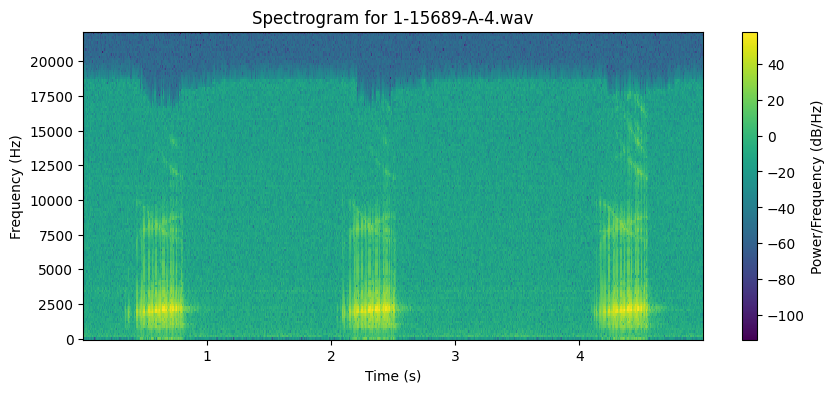

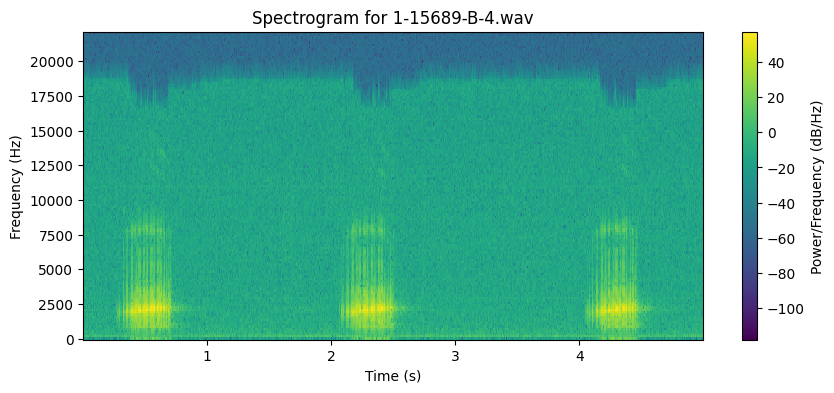

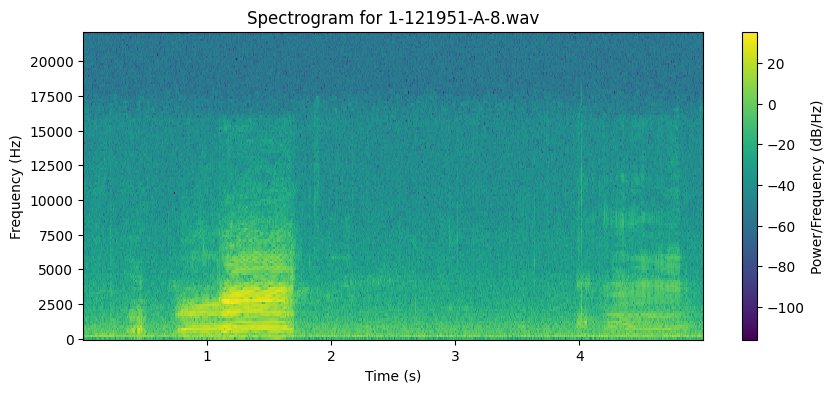

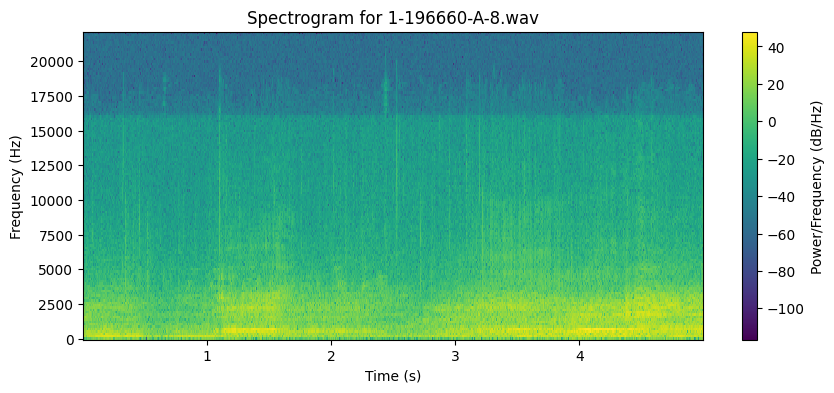

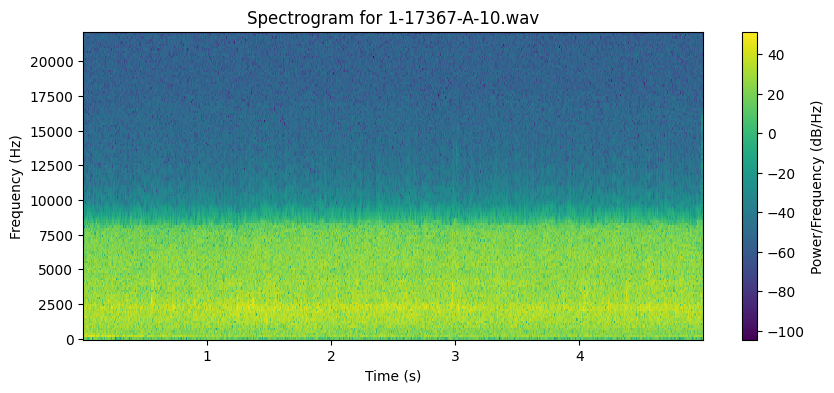

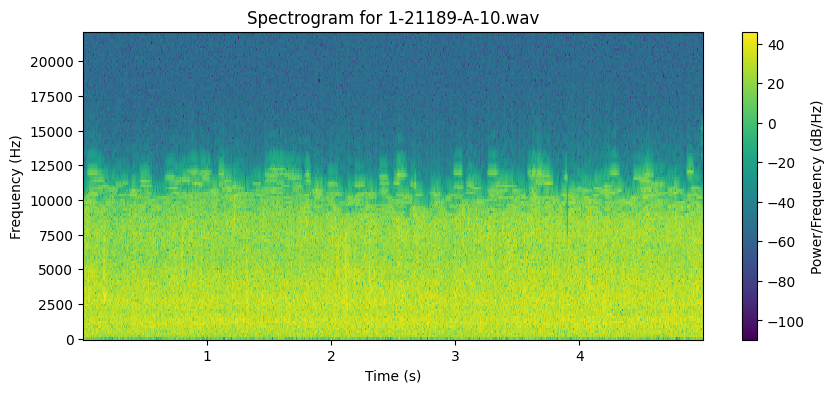

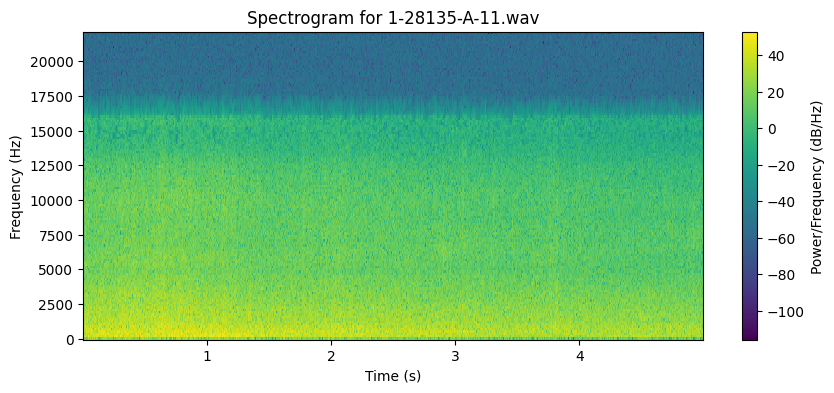

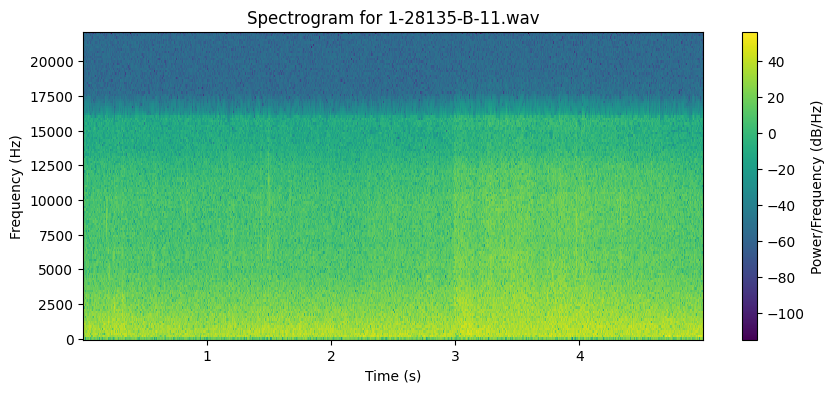

C:\Users\Dell\AppData\Local\Temp\ipykernel_17832\2762988326.py:24: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='auto', cmap='viridis')


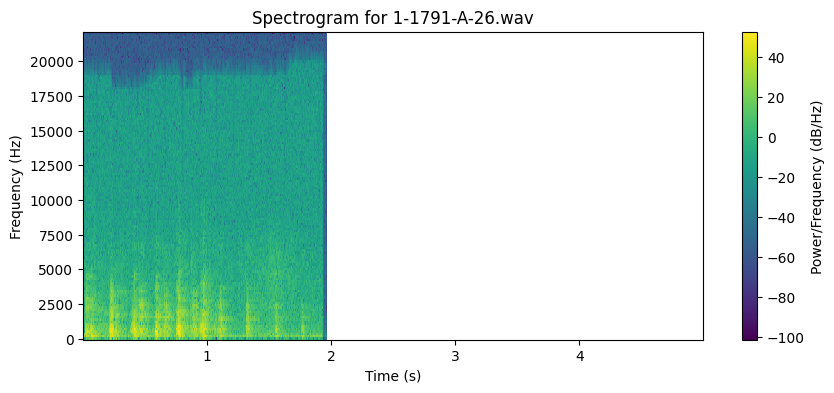

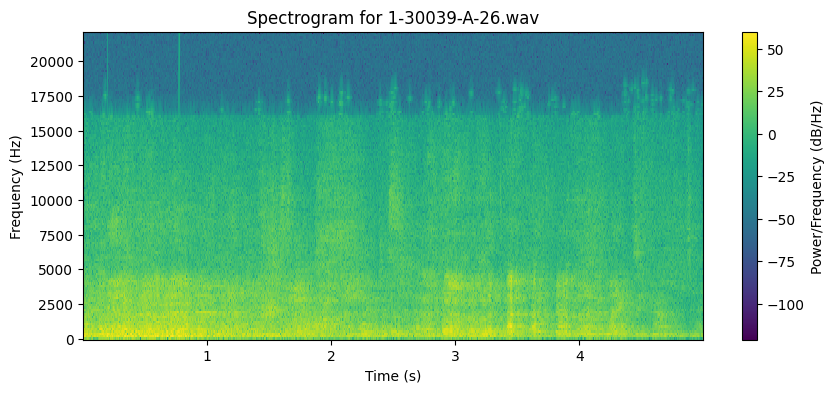

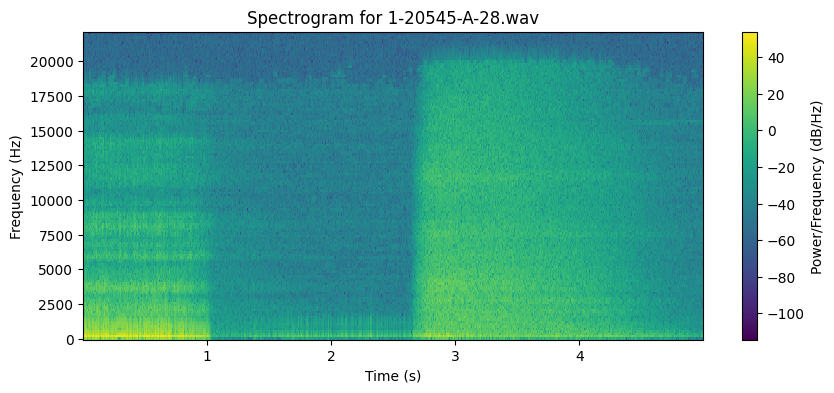

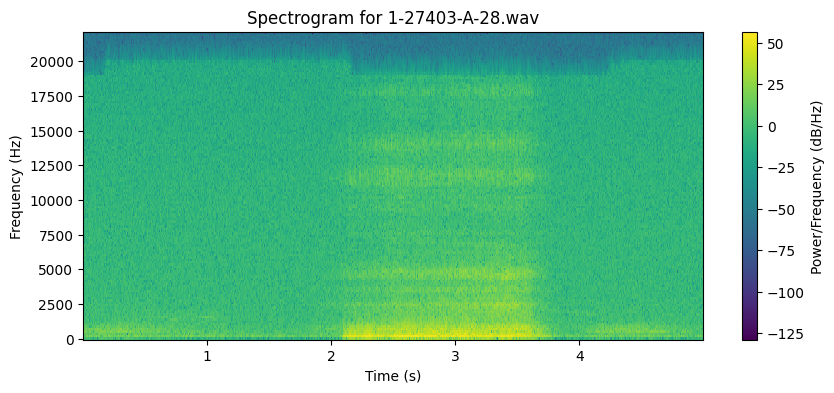

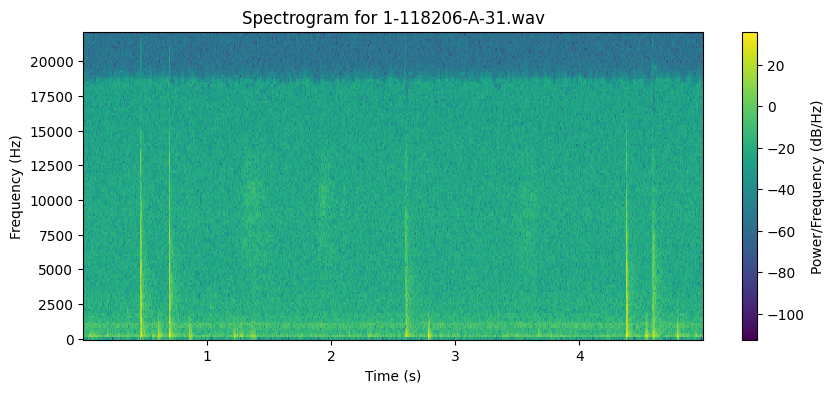

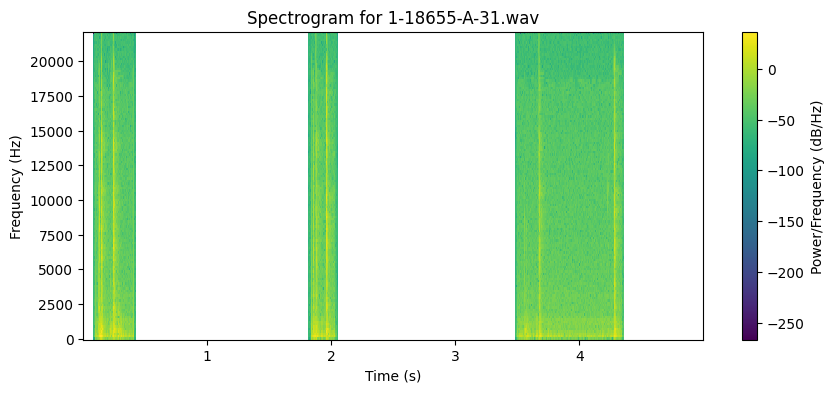

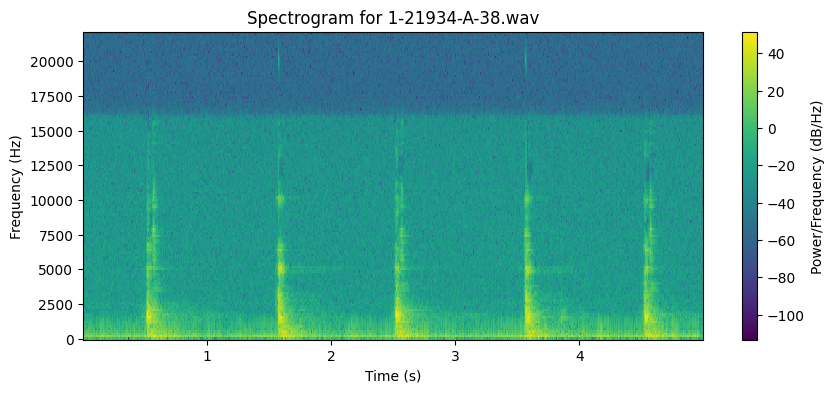

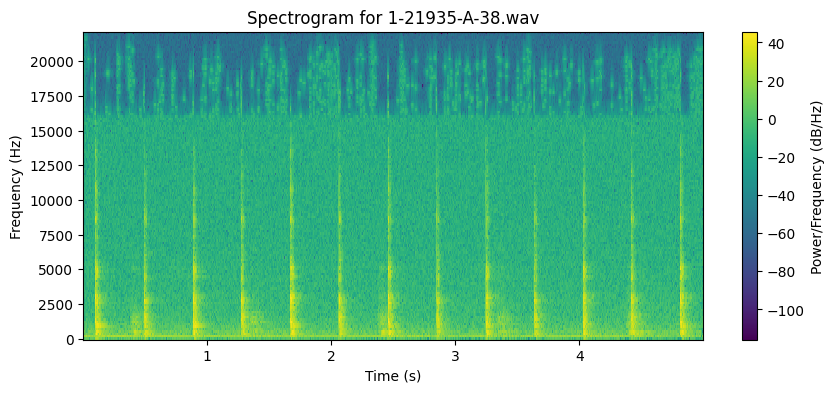

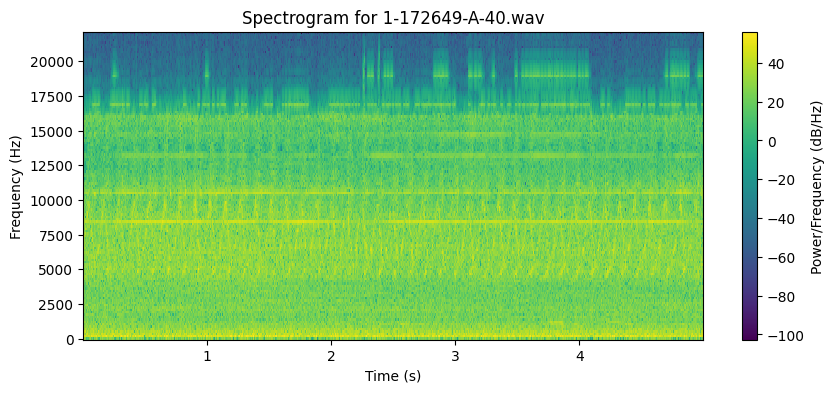

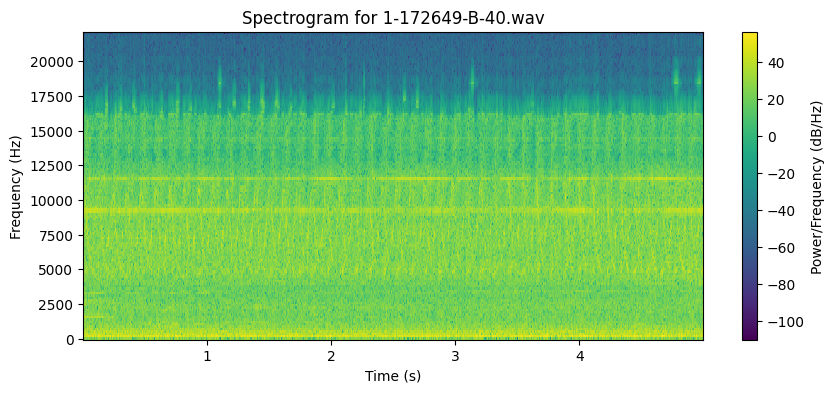

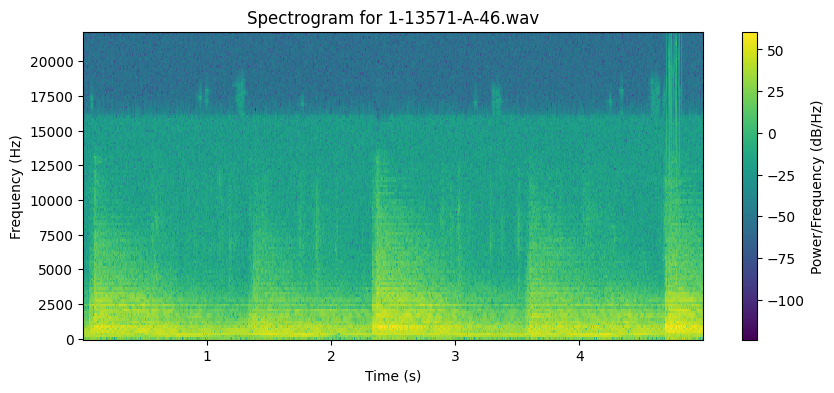

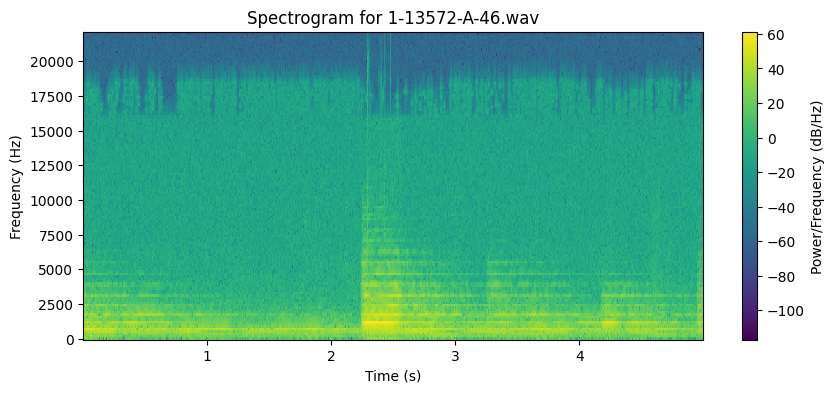

In [22]:
import os
import pandas as pd
import shutil
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram

# Your existing code for selecting and copying files

# Specify the path to the new directory
new_directory = 'my_audio'

# Function to plot spectrogram
def plot_spectrogram(file_path):
    # Load the audio file using scipy
    sample_rate, samples = wavfile.read(file_path)

    # Compute the spectrogram
    f, t, Sxx = spectrogram(samples, fs=sample_rate)

    # Plot the spectrogram
    plt.figure(figsize=(10, 4))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='auto', cmap='viridis')
    plt.title(f'Spectrogram for {os.path.basename(file_path)}')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label='Power/Frequency (dB/Hz)')
    plt.show()

# Iterate through the target audio files
for i in my_target_audio:
    # Filter the data frame based on the condition
    selected_files = df[df[audio_column].str.endswith(f'{-i}.wav')][audio_column]
    
    # Create a new directory if it doesn't exist
    os.makedirs(new_directory, exist_ok=True)
    
    # Initialize j outside the file loop
    j = 0
    
    # Iterate through the selected files and plot the spectrogram for each
    for file_name in selected_files:
        if j < 2:
            # Construct the full path to the audio file in the new directory
            audio_path = os.path.join(new_directory, file_name)
        
            # Plot the spectrogram for the selected file
            plot_spectrogram(audio_path)
            
            # Increment j
            j += 1
    
    # Reset j for the next category
    j = 0
